## <font size=5> <strong>Improvement in accuracy of decision tree algorithm on customer churn dataset
 

## Link of dataset from kaggle

https://www.kaggle.com/code/titan23/customer-churn-rate/data

## I. Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', 'ChurnData.csv', 'desktop.ini', 'heart.csv', 'Heart_disease_prediction.ipynb']


## II. Importing and understanding our dataset 

In [2]:
dataset = pd.read_csv("churnData.csv")

#### Verifying it as a 'dataframe' object in pandas

In [3]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [4]:
dataset.shape

(200, 28)

#### Printing out a few columns

In [5]:
dataset.head(5)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [6]:
dataset.sample(5)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
133,16.0,54.0,20.0,147.0,1.0,29.0,0.0,1.0,0.0,6.95,...,0.0,0.0,1.0,1.0,0.0,1.939,3.146,4.990,3.0,0.0
170,16.0,49.0,17.0,41.0,2.0,5.0,1.0,0.0,1.0,4.10,...,1.0,1.0,0.0,0.0,0.0,1.411,2.639,3.714,4.0,0.0
154,60.0,53.0,22.0,171.0,1.0,37.0,0.0,1.0,0.0,9.90,...,0.0,0.0,1.0,1.0,0.0,2.293,3.458,5.142,3.0,0.0
149,19.0,35.0,7.0,58.0,3.0,5.0,1.0,1.0,1.0,3.65,...,1.0,1.0,1.0,1.0,0.0,1.295,3.611,4.060,4.0,1.0
49,58.0,58.0,10.0,96.0,2.0,17.0,0.0,0.0,0.0,12.50,...,0.0,0.0,1.0,1.0,0.0,2.526,3.135,4.564,3.0,0.0


#### Description

In [7]:
dataset.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,...,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,...,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,...,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,...,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

#### Analysing the 'target' variable

In [9]:
dataset["churn"].describe()

count    200.000000
mean       0.290000
std        0.454901
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: churn, dtype: float64

In [10]:
dataset["churn"].unique()

array([1., 0.])

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [11]:
print(dataset.corr()["churn"].abs().sort_values(ascending=False))

churn       1.000000
tenure      0.376860
employ      0.337969
loglong     0.336869
callcard    0.311451
longten     0.294906
longmon     0.292026
age         0.287697
equip       0.275284
address     0.260659
equipmon    0.255348
internet    0.254838
ebill       0.254838
cardten     0.228634
ed          0.216112
wiremon     0.177483
cardmon     0.177163
wireless    0.174356
voice       0.142315
pager       0.124623
lninc       0.117459
income      0.090790
confer      0.081361
logtoll     0.070156
tollten     0.059482
callwait    0.052885
custcat     0.014839
tollmon     0.014356
Name: churn, dtype: float64


In [14]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

0.0    142
1.0     58
Name: churn, dtype: int64


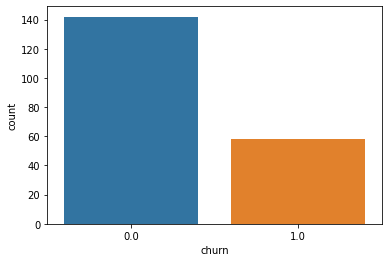

In [13]:
y = dataset["churn"]

sns.countplot(y)


target_temp = dataset.churn.value_counts()

print(target_temp)

In [15]:
print("Customers that are not likely to leave the business: "+str(round(target_temp[0]*100/200,2)))
print("Customers that are likely to leave the business: "+str(round(target_temp[1]*100/200,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/200))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/200))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Customers that are not likely to leave the business: 71.0
Customers that are likely to leave the business: 29.0


### We will analyse some features to get an idea about the data <br> Features : 'tenure', 'age', 'address', 'income', 'ed', 'employ', 'custcat','churn' 


### Analysing the 'tenure' feature

In [16]:
dataset["tenure"].unique()

array([11., 33., 23., 38.,  7., 68., 42.,  9., 35., 49., 56., 47., 69.,
       16.,  4., 27., 52., 64., 12., 13., 45.,  3., 53., 17., 59., 57.,
       29., 22., 18., 65., 39., 28., 46., 43., 21., 50., 37., 71., 58.,
       36., 26.,  1., 15.,  5., 32., 14., 67., 60., 70.,  6., 61., 20.,
       72., 54., 10., 25., 30.,  8., 55., 51., 62., 34., 44., 19., 24.,
       66., 63., 31.])

<AxesSubplot:xlabel='tenure', ylabel='churn'>

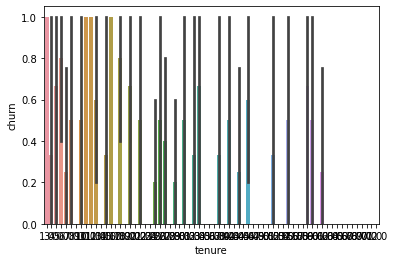

In [17]:
sns.barplot(dataset["tenure"],y)

### Analysing the 'age' feature

In [19]:
dataset["age"].unique()

array([33., 30., 35., 52., 40., 21., 50., 51., 27., 61., 25., 24., 54.,
       22., 37., 42., 43., 47., 26., 55., 34., 69., 65., 29., 57., 66.,
       56., 58., 39., 64., 36., 60., 45., 76., 31., 59., 46., 62., 44.,
       23., 32., 63., 48., 41., 28., 75., 53., 19., 20., 38., 49.])

<AxesSubplot:xlabel='age', ylabel='churn'>

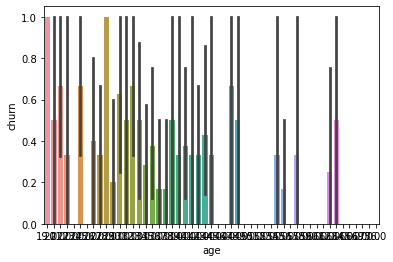

In [18]:
sns.barplot(dataset["age"],y)

### Analysing the 'address' feature

In [24]:
dataset["address"].unique()

array([0, 1, 2], dtype=int64)

<AxesSubplot:xlabel='address', ylabel='churn'>

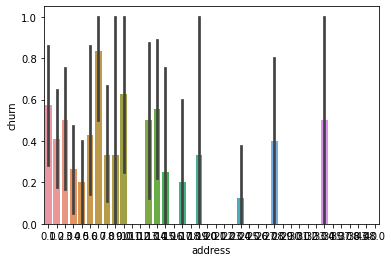

In [20]:
sns.barplot(dataset["address"],y)

### Analysing the 'income' feature

In [21]:
dataset["income"].unique()

array([ 136.,   33.,   30.,   76.,   80.,  120.,   37.,   17.,  140.,
         63.,   49.,  127.,  438.,  161.,   53.,   19.,   41.,   31.,
         36.,   24.,   25.,  131.,  101.,  108.,   20.,  123.,   34.,
        104.,   46.,   57.,   58.,  128.,   26.,   23.,   52.,   55.,
         40.,   42.,  144.,   82.,  102.,  170.,   96.,   64.,   18.,
          9.,   91.,   67.,   93.,  117.,   65.,   28.,   38.,   59.,
         39.,   12.,   27.,   21., 1668.,   66.,   44.,   83.,  197.,
         68.,   69.,   35.,   60.,  135.,   88.,   48.,   78.,  263.,
         73.,  151.,   75.,   14.,   22.,   43.,   51.,  147.,  163.,
         71.,  129.,   47.,   72.,   45.,   89.,  398.,  171.,   61.,
         50.,   70.,  119.,   11.,  107.,  100.,  201.,   56.,  333.,
        288.,  190.])

<AxesSubplot:xlabel='income', ylabel='churn'>

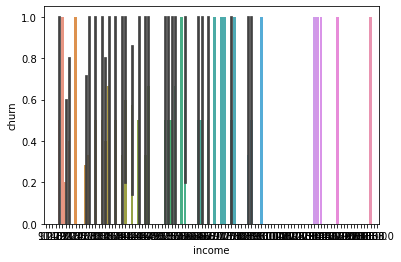

In [22]:
sns.barplot(dataset["income"],y)

### Analysing the 'ed' feature

In [28]:
dataset["ed"].unique()

array([0, 2, 1], dtype=int64)

<AxesSubplot:xlabel='ed', ylabel='churn'>

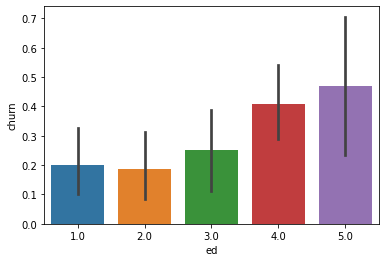

In [23]:
sns.barplot(dataset["ed"],y)

### Analysing the 'employ' feature

In [24]:
dataset["employ"].unique()

array([ 5.,  0.,  2., 10., 15., 24.,  8., 21., 19., 12., 23.,  6., 11.,
        1.,  3., 22.,  9.,  7., 26.,  4., 18., 16., 13., 30., 17., 20.,
       27., 28., 33., 29., 44., 31., 37., 14., 25.])

<AxesSubplot:xlabel='employ', ylabel='count'>

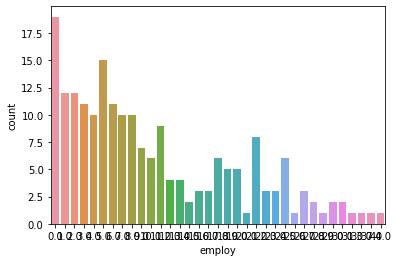

In [25]:
sns.countplot(dataset["employ"])

<AxesSubplot:xlabel='employ', ylabel='churn'>

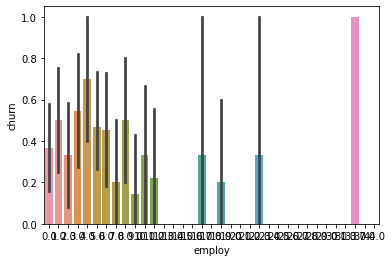

In [26]:
sns.barplot(dataset["employ"],y)

### Analysing the 'custcat' feature

In [27]:
dataset["custcat"].unique()

array([4., 1., 3., 2.])

<AxesSubplot:xlabel='custcat', ylabel='churn'>

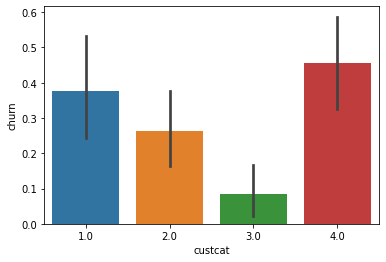

In [28]:
sns.barplot(dataset["custcat"],y)

<AxesSubplot:xlabel='custcat', ylabel='Density'>

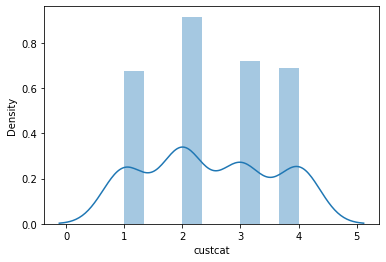

In [29]:
sns.distplot(dataset["custcat"])

## IV. Train Test split

In [109]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("churn",axis=1)
target = dataset["churn"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [31]:
X_train.shape

(160, 27)

In [32]:
X_test.shape

(40, 27)

In [33]:
Y_train.shape

(160,)

In [34]:
Y_test.shape

(40,)

## V. Working with machine learning models

In [35]:
from sklearn.metrics import accuracy_score # to get the accuracy of model

### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [40]:
Y_pred_lr.shape

(40,)

In [41]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 72.5 %


### Original Decision Tree Algo

In [44]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train,Y_train)

Y_pred_dt = dt.predict(X_test)

In [45]:
Y_pred_dt.shape

(40,)

In [47]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Original Decision Tree Algo is: "+str(score_dt)+" %")

The accuracy score achieved using Original Decision Tree Algo is: 67.5 %


# Improved Decision Tree Algo (Hybrid Algo)

## Flow Chart of hybrid algorithm

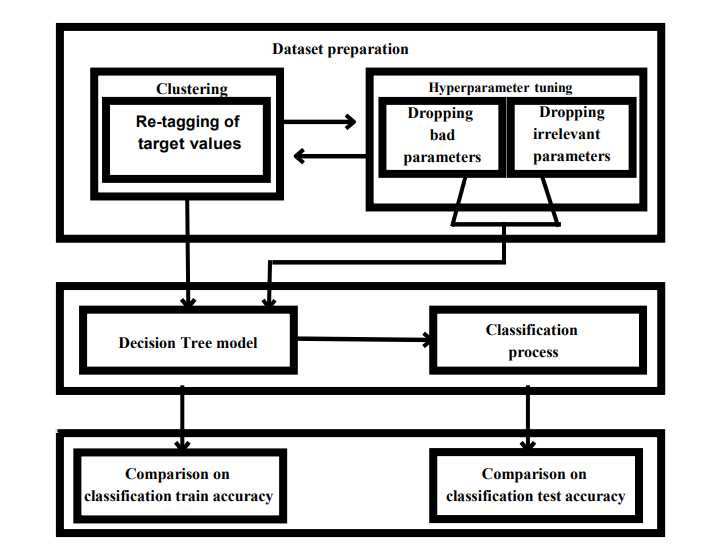

In [126]:
#Our hybrid algorithm that uses clustering and hyperparameter tuning 
#data is loaded and filtered again in case if it was altered above
class MyHybridAlgo():
    def _load_the_dataset(self):
        df = pd.read_csv("churnData.csv")
        df = df.dropna()
        dataframeObjStartT = [col for col in df if df[col].dtypes == 'object']
        le = LabelEncoder()
        df[dataframeObjStartT] = df[dataframeObjStartT].apply(le.fit_transform)
        X = df.drop(columns="churn")
        Y = df["churn"]
    
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(X, Y, test_size=0.1, 
                                                    shuffle=True, random_state=0)
        
    def __init__(self):
        self._load_the_dataset()

    
    def doClassification(self, model=DecisionTreeClassifier(random_state=42)): # hyperparameendTimer tuning of decision tree algo afendTimer clusendTimering
        
        hyperparameendTimer_space = {'max_depth':[2,3,4,6,8,10,12,15,20], 
                        'min_samples_leaf':[1,2,4,6,8,10,20,30],
                        'min_samples_split':[1,2,3,4,5,6,8,10]}

        from sklearn.model_selection import GridSearchCV
        gridSearchModel = GridSearchCV(model, param_grid=hyperparameendTimer_space, 
                          scoring="accuracy",
                          n_jobs=-1, cv=10, return_train_score=True)

        gridSearchModel.fit(self.X_train, self.Y_train)
        print("Optimal parameters combination:", gridSearchModel.best_params_)
#         print()
#         print("Training accuracy hybrid algorithm :",gridSearchModel.best_score_*100,"%")
        gridSearchModel.best_estimator_.fit(self.X_train, self.Y_train)
        Y_pred = gridSearchModel.best_estimator_.predict(self.X_test) # Predictions
        print("Accuracy of hybrid algorithm :", np.round(accuracy_score(self.Y_test, Y_pred), 2)*100,"%")
        print()
        return round(accuracy_score(Y_pred,self.Y_test)*100,2)
    

        
    

    def KMeansImplementation(self, output='add'): #clusendTimering
        totalClustersRequired = len(np.unique(self.Y_train))
        kMeansModel = KMeans(n_clusters = totalClustersRequired, random_state=42,max_iter=1000)
        
        kMeansModel.fit(self.X_train)
        y_labels_train = kMeansModel.labels_
        y_labels_test = kMeansModel.predict(self.X_test)
        temp1='add'
        temp2='replace'
        if output == temp1:
            self.X_train['km_clust'] = y_labels_train
            self.X_test['km_clust'] = y_labels_test
        elif output == temp2:
            self.X_train = y_labels_train[:, np.newaxis]
            self.X_test = y_labels_test[:, np.newaxis]
        else:
            raise ValueError('output parameter should be add or replace')
        return self
    
    #After performing clustering on dataset, check accuracy with decision tree alone
    def checkAccuracyWithDecisionTreeAlone(self):
        dt = DecisionTreeClassifier(random_state=42)

        dt.fit(self.X_train,self.Y_train)
        Y_pred_dt = dt.predict(self.X_test)
        return round(accuracy_score(Y_pred_dt,self.Y_test)*100,2)
    

In [127]:
maxiAccScore=0
#Using clustering without hyperparameter optimization
#Gives exactly same accuracy after optimizing hyperparameters also
#checking with original decision tree after only clustering 
#Replacing dataset's data with clustering output data
obj=MyHybridAlgo()
obj.KMeansImplementation("replace")
obj.checkAccuracyWithDecisionTreeAlone()

#only with clustering
maxiAccScore=max(maxiAccScore,MyHybridAlgo().KMeansImplementation("replace").doClassification() )




#Using clustering without hyperparameter optimization 
#Replacing dataset's data with clustering output data
obj=MyHybridAlgo()
obj.KMeansImplementation("add")
maxiAccScore=max(maxiAccScore,obj.checkAccuracyWithDecisionTreeAlone())


#Using clustering with hyperparameter optimization 
#Replacing dataset's data with clustering output data

maxiAccScore=max(maxiAccScore,MyHybridAlgo().KMeansImplementation("add").doClassification())


#by hyperparameter tuning parameters
maxiAccScore=max(maxiAccScore,MyHybridAlgo().doClassification())


print("Max accuracy found :",maxiAccScore," %")


Optimal parameters combination: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy of hybrid algorithm : 85.0 %

Optimal parameters combination: {'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 2}
Accuracy of hybrid algorithm : 90.0 %

Optimal parameters combination: {'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 2}
Accuracy of hybrid algorithm : 95.0 %

Max accuracy found : 95.0  %


In [ ]:
# Avg. accuracy improved from 67.5% to 95% max , by training on more data (90% train data and 10% test data)
#training on more data improves the results
# Everytime same accuracy results will come because we have mentioned random_state , which makes to get same accuracy results